## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from collections import Counter
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Data Preprocessing

In [ ]:
wine_data = pd.read_csv('/content/winequality-white.csv',delimiter=';')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


fixed acidity - most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

volatile acidity - the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

citric acid - found in small quantities, citric acid can add 'freshness' and flavor to wines

residual sugar - the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

chlorides - the amount of salt in the wine

free sulfur dioxide - the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

total sulfur dioxide - amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

density - the density of water is close to that of water depending on the percent alcohol and sugar content

pH - describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

sulphates - a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

alcohol - the percent alcohol content of the wine

quality - output variable (based on sensory data, score between 0 and 10)


In [ ]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Exploring and Dealing with Outliers

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


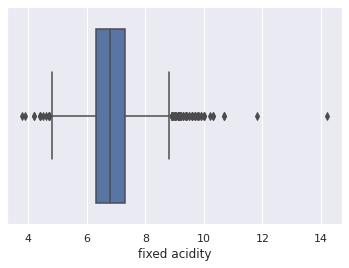

In [ ]:
sns.boxplot(wine_data['fixed acidity'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


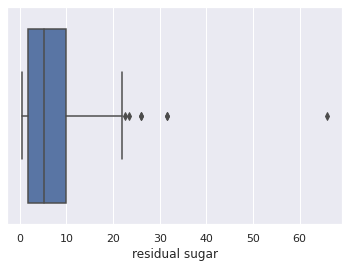

In [ ]:
sns.boxplot(wine_data['residual sugar'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


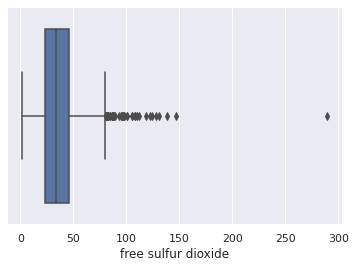

In [ ]:
sns.boxplot(wine_data['free sulfur dioxide'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


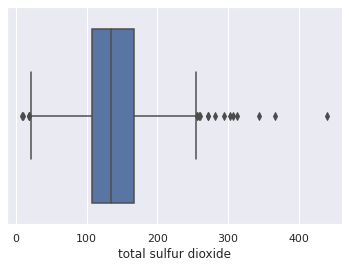

In [ ]:
sns.boxplot(wine_data['total sulfur dioxide'])

In [ ]:
Q1 = wine_data.quantile(0.25) #lower bound
Q3 = wine_data.quantile(0.75) #upper bound
IQR = Q3 - Q1
print(IQR)

fixed acidity            1.000000
volatile acidity         0.110000
citric acid              0.120000
residual sugar           8.200000
chlorides                0.014000
free sulfur dioxide     23.000000
total sulfur dioxide    59.000000
density                  0.004377
pH                       0.190000
sulphates                0.140000
alcohol                  1.900000
quality                  1.000000
dtype: float64


In [ ]:
#Using IQR to deal with the outliers
wine_data_1 = wine_data[~((wine_data < (Q1 - 3 * IQR)) | (wine_data > (Q3 + 3 * IQR))).any(axis= 1)]
wine_data_1.shape

(4690, 12)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


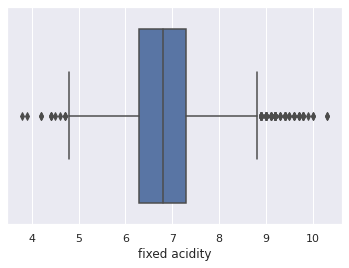

In [ ]:
sns.boxplot(wine_data_1['fixed acidity'])

In [ ]:
#Creating bins. This would make it easier to perform analysis and it would also be used in my machine learning model.
bins= [0, 4, 7, np.inf]

#This categorizes bad wine grades as 0-4, Good as 5-6 and Excellent as 20-59.
labels= ['Bad', 'Good','Excellent']

wine_data_1['wine_grade'] = pd.cut(wine_data_1['quality'], bins=bins, labels=labels)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
wine_data_1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_grade
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Good
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Good
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Good
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Good
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Good


In [ ]:
wine_data_1['wine_grade'].value_counts()

Good         4359
Excellent     176
Bad           155
Name: wine_grade, dtype: int64

From the value counts, we can see that the data is highly imbalanced with the majority of cases having 'good' wine grades

## Exploratory Data Analysis (EDA)

#### WHAT IS THE DISTRIBUTION OF WINE QUALITY?

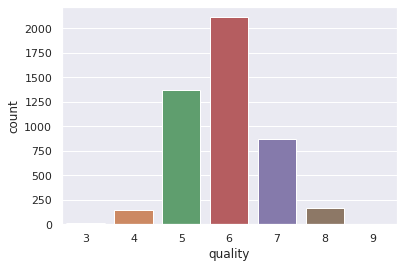

In [ ]:
sns.countplot(x='quality', data = wine_data_1)

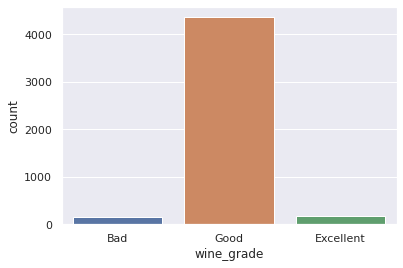

In [ ]:
sns.countplot(x='wine_grade', data = wine_data_1)

#### HOW DOES VOLATILE ACIDITY AFFECT THE QUALITY OF WINES?

Volatile acidity - the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

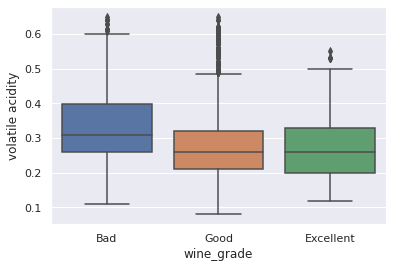

In [ ]:
sns.boxplot(x ='wine_grade', y ='volatile acidity', data = wine_data_1)

#### HOW DOES CITRIC ACID AFFECT THE QUALITY OF WINES?

Citric acid - found in small quantities, citric acid can add 'freshness' and flavor to wines

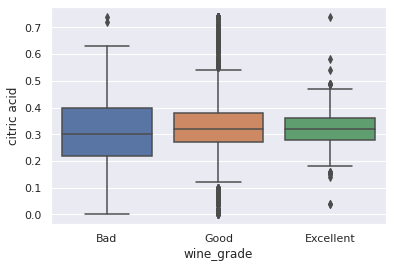

In [ ]:
sns.boxplot(x ='wine_grade', y ='citric acid', data = wine_data_1)

#### WHAT IS THE EFFECT OF RESIDUAL SUGAR ON THE QUALITY OF WINES?

Residual sugar - the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

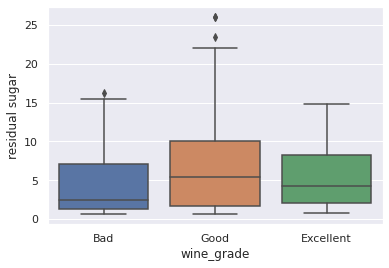

In [ ]:
sns.boxplot(x ='wine_grade', y ='residual sugar', data = wine_data_1)

#### DOES DENSITY AFFECT THE QUALITY OF WINE PRODUCED?

Density - the density of water is close to that of water depending on the percent alcohol and sugar content

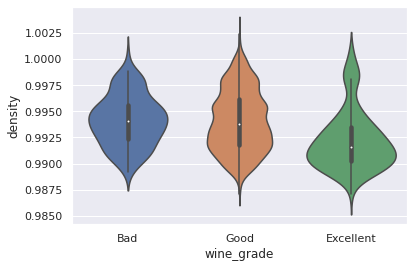

In [ ]:
sns.violinplot(x ='wine_grade', y ='density', data = wine_data_1)

## Splitting and transforming the data

In [ ]:
X= wine_data_1.drop(['wine_grade'], axis =1)
y = wine_data_1['wine_grade']

In [ ]:
lab_enc = LabelEncoder()
y = lab_enc.fit_transform(y)

In [ ]:
print(y[:5])

[2 2 2 2 2]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### Dealing with Data Imbalance

In [ ]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Class = 2, n = 3283 (70.000%)
Class = 0, n = 3283 (70.000%)
Class = 1, n = 3283 (70.000%)


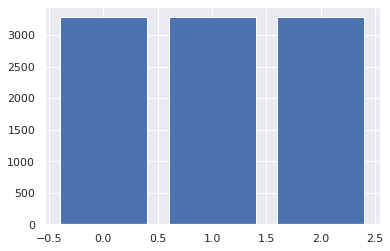

In [ ]:
counter = Counter(y_train)
for k,v in counter.items():
  per = v/len(y)*100
  print('Class = %d, n = %d (%.3f%%)' %(k,v,per))
plt.bar(counter.keys(),counter.values())
plt.show()

## Standardizing the data

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Machine Learning Algorithm

In [ ]:
models =  [LogisticRegression(multi_class='multinomial'),
           KNeighborsClassifier(),
           SVC(kernel = 'linear'), 
           SVC(kernel = 'rbf'), 
           GaussianNB(), 
           DecisionTreeClassifier(), 
           RandomForestClassifier(), 
           XGBClassifier(),
           LGBMClassifier(),
           ExtraTreesClassifier()]

a, b, c, d = [], [], [], []

for i in models:
    model = i.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    a.append(accuracy_score(y_test, y_pred))
    b.append(f1_score(y_test, y_pred, average = 'weighted'))
    c.append(precision_score(y_test, y_pred, average = 'weighted'))
    d.append(recall_score(y_test, y_pred, average = 'weighted'))
    
class_metrics = pd.DataFrame([a, b, c, d], index = ['Accuracy','F1 Score','Precision','Recall'], 
                             columns = ['LogisticReg','KNN','SVM','KSVM','Naive Bayes','Decision Tree','Random Forest', 
                                        'XGBoost','LGBM','Extra Trees'])

class_metrics.transpose().sort_values(by='Accuracy', ascending=True)

,Accuracy,F1 Score,Precision,Recall
KNN,0.844842,0.872094,0.924258,0.844842
Naive Bayes,0.993180,0.993014,0.993230,0.993180
KSVM,0.995737,0.995620,0.995757,0.995737
LogisticReg,1.000000,1.000000,1.000000,1.000000
SVM,1.000000,1.000000,1.000000,1.000000
Decision Tree,1.000000,1.000000,1.000000,1.000000
Random Forest,1.000000,1.000000,1.000000,1.000000
XGBoost,1.000000,1.000000,1.000000,1.000000
LGBM,1.000000,1.000000,1.000000,1.000000
Extra Trees,1.000000,1.000000,1.000000,1.000000
